In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [46]:
sns.set(style="whitegrid")

In [47]:
try:
    df = pd.read_csv('dataset/train.csv')
except FileNotFoundError:
    print("Error: 'dataset/train.csv' not found.")
    print("Please make sure the 'dataset' folder with 'train.csv' is in the same directory as the script.")
    exit()

In [48]:
for col in ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']:
    df[col] = df[col].fillna(0)

In [49]:
df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

In [50]:
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
target = 'SalePrice'

In [51]:
X = df[features]
y = df[target]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed successfully.\n")

Model training completed successfully.



In [54]:
y_pred = model.predict(X_test)

In [55]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
print("--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R²): {r2:.4f}")
print("------------------------\n")

--- Model Evaluation ---
Mean Absolute Error (MAE): $34,395.80
R-squared (R²): 0.6579
------------------------



In [57]:
print("Plotting predicted prices vs. actual prices for the test set.")

Plotting predicted prices vs. actual prices for the test set.


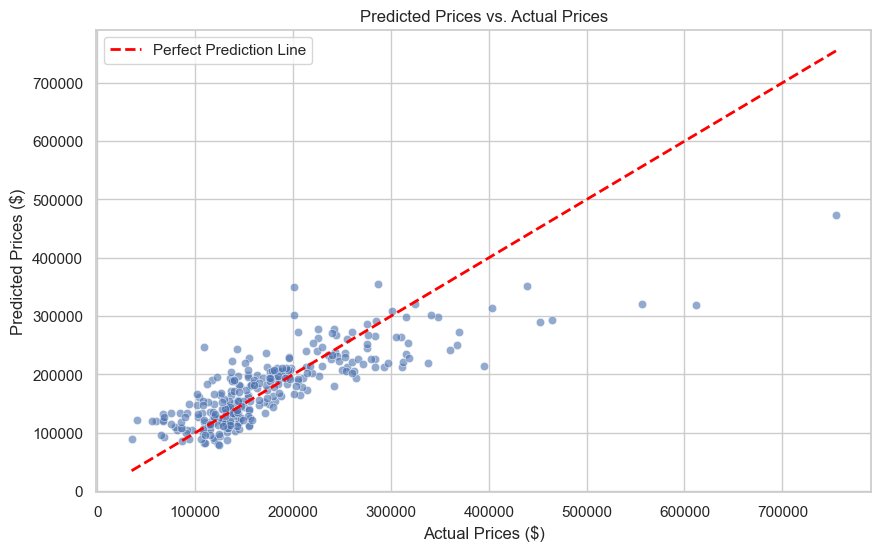

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction Line')

plt.title('Predicted Prices vs. Actual Prices')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.legend()
plt.grid(True)
plt.show()